In [1]:
##########################NOTE::::
########################PLEASE READ BEFORE EXECUTION #################
"""
Assumptions :
    As assignment suggests, cursory analysis of stock companies, 
    that focus on understanding 2 params: MARKETCAP_RS_CR and P/E(P_BY_E) ratio
    and also various sectors based performance and distribution
    Thus I remove the cases where MARKETCAP_RS_CR and P/E(P_BY_E) ratio
    for CONSOLIDATED cases is absent.
    AS1: Basically we have 2 possible values. But I consider only CONSOLIDATED
    AS2: Remove NAN cases
    AS3: Consider MARKETCAP_RS_CR based ranking for only those sectors who have > 4 companies
    AS4: I dont write generic code for scrape. Code will impact, if website changes format
    and reduce or increase no of parameters
    AS5: in part 5 description below
    
STEP 1: DATA SCRAPE
Part 1 consists of web scraping of html links and list of 500 companies which appears
on :
    www.moneycontrol.com/india/stockpricequote
    When code is excuted, its necessary to either provide:
        www.moneycontrol.com/india/stockpricequote
        or
        provide list of companies in list companybook
 links_moneycontrol_v5.csv willbe file composed of all 500 companies on part 1 
completion

Part 2: DATA SCRAPE
This section contains all logic to extract the information of CONSOLIDATED Company
parameters for all 500 companies
This section will try to contact moneycontrol 500 times, thus may take time.
I didnt focus to optimize this time.
The web scraping takes 30 -40 mins
and finally we get the transpose file:       input_scrape_moneycontrol_500.csv

PART 3: Data Cleaning
CHECKING DUPLICATES, renaming columns, removing extra characters, datatype conversions
, fill NAN, drop NAN

PART 4: Data analysis and decide assumptions

PART 5:  Bucket P/E ratios in interval of 5, 11-15,16-20,21-25,...,66-70, then output list of
companies in each bucket
AS5: THERE ARE OUTLIERS in P/E meaning many cases where P/E > 70
I dont worry, as its not asked in question. Although need to worry, if its real market data
and need to find other resources to verify

PART 6: 3rd and 4th highest market cap companies sector wise.
ASSUMPTION: DO analysis for sectors having more than 3 companies
I try 3 methods to solve it. And 1 method successful
BUT pandasql method fails as rank or rownum feature not available in it 
Also method of groupby and then use rank fails, for few cases. Getting warning message 
which can be corrected. 

"""
 
#########################PART 1 ################################3   
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np  
import time  

In [2]:
 #---TRYING TO MAKE DICTIONARY
# Values will store the value of various params like p/e, marketcap, book value etc    
values = []
print ("Please mention what all companies you want to extract: PRESS 1 if you want all 500 companies. PRESS 2, if you want to provide list")
choice_input=input("ENTER THE VALUE:")

Please mention what all companies you want to extract: PRESS 1 if you want all 500 companies. PRESS 2, if you want to provide list
ENTER THE VALUE:2


In [3]:
url = input("Enter a website to extract the URL's from !!!!NOTE!!!: ALWAYS copy from browser the link:: www.moneycontrol.com/india/stockpricequote:")

Enter a website to extract the URL's from !!!!NOTE!!!: ALWAYS copy from browser the link:: www.moneycontrol.com/india/stockpricequote:www.moneycontrol.com/india/stockpricequote


In [4]:
print (url)
r  = requests.get("http://" +url)

data = r.text

soup = BeautifulSoup(data, "lxml")
mydivs = soup.findAll("a", {"class": "bl_12"})

www.moneycontrol.com/india/stockpricequote


In [5]:
for link in mydivs:
     value=link.get('href')
     values.append(value)
     #print(link.get('href'))
    
    
    
#for link in soup.find_all('a'):
    #print(link.get('href'))#
test_df = pd.DataFrame({'LINK': values})
print(test_df.info())    
e='a'
test_df['company_code'] = e
test_df['company_category'] = e
test_df['company_name'] = e


#FILL company_code
# FOR EXAMPLE: http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/yesbank/YB
#has company code located as substring value after rightmost appearence of /
# SIMILAR BEHAVIOR for every 500 companies on http://www.moneycontrol.com/india/stockpricequote
for index, row in test_df.iterrows():
    i= (row["LINK"])
    #print (row.LINK)
    #print(i[i.rfind('/')+1:])  
    test_df.loc[index, 'company_code'] =(i[i.rfind('/')+1:])
#FILL company_category 
# FOR EXAMPLE: http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/yesbank/YB
#has company_category located as substring value only after immediate right  of http://www.moneycontrol.com/india/stockpricequote/
# which comes at 50 th position and from that 50th position to next occurance of '/'    
for index, row in test_df.iterrows():
    i= (row["LINK"])
    #print(i[50:50+i[50:].find('/') ])
    test_df.loc[index, 'company_category'] =(i[50:50+i[50:].find('/') ])
#FILL company_name
#similarly this is automatically understood    
for index, row in test_df.iterrows():
    i= (row["LINK"])
    test_df.loc[index, 'company_name'] =(i[50+i[50:].find('/')+1: i.rfind('/')])

# deleting unwanted junk rows
test_df = test_df[test_df.LINK != 'javascript:;']
#MAKE dictionary
d= dict([(i,a) for i, a in zip( test_df.company_code, test_df.LINK)])
#print (d)    
for k,v in d.items():
            print(k, 'corresponds to', v)
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 1 columns):
LINK    502 non-null object
dtypes: object(1)
memory usage: 4.0+ KB
None
MI42 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
PMS01 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01
AI45 corresponds to http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45
AO04 corresponds to http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04
ABB corresponds to http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB
AI51 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51
ACC06 corresponds to http://www.moneycontrol.com/india/stockpricequote/cementmajor/acc/ACC06
AE13 corresponds to http://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises

SF23 corresponds to http://www.moneycontrol.com/india/stockpricequote/fasteners/sundramfasteners/SF23
SR05 corresponds to http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/sunteckrealty/SR05
SI48 corresponds to http://www.moneycontrol.com/india/stockpricequote/plastics/supremeindustries/SI48
SLS01 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/suvenlifesciences/SLS01
SE17 corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/suzlonenergy/SE17
SM09 corresponds to http://www.moneycontrol.com/india/stockpricequote/trading/swanenergy/SM09
SCS04 corresponds to http://www.moneycontrol.com/india/stockpricequote/consumergoodswhitegoods/symphony/SCS04
SB9 corresponds to http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/syndicatebank/SB9
SI10 corresponds to http://www.moneycontrol.com/india/stockpricequote/miscellaneous/syngeneinternational/SI10
TS09 corresponds to http://

In [6]:
##########################################################################
#final  dictionary
# based on initial input choice at stdin, the dictionary is created either for list of few companies to analyze or
# for all 500 companies

if choice_input == '2':
    
    input_flag=''
    while input_flag == '':
     codes=[]
     lim= int(input("HOW MANY COMPANY CODES TO ANALYZE?"))
     print ("Enter all codes in 1 go, same as quantity YOU EXPRESS ")
     codes = [str(x) for x in input().split()]
     if len(codes)!= lim:
        print("RE-ENTER THE COMPANY CODES AGAIN, SAME AS COMPANY CODES TO ANALYZE?" )
     else:
      companybook=dict((k, d[k]) for k in codes)
      input_flag='INPUT_FINISH_FROM_USER'
      print ("INPUT FINISH AND BELOW IS LIST FOR FURTHER DATA EXTRACTION AND ANALYSIS")
      print (companybook)  


#############THIS BLOCK will choose if we want to do analysis of all 500 companies
if choice_input == '1':
 companybook=d
 print ("INPUT FINISH AND all 500 companies processing begins FOR FURTHER DATA EXTRACTION AND ANALYSIS")
#############3


HOW MANY COMPANY CODES TO ANALYZE?100
Enter all codes in 1 go, same as quantity YOU EXPRESS 
CTI PEP02 SII04 T04 PFR CRI CES SM11 OR V ET01 TC EI II15 GRU ACC06 LIC OI13 CDB GSC04 N07 IS13 KNP BHE TVS MMF04 PLN LFH S NMD02 AC18 CHC L M13 HPC DI BPC W HCL02 AB16 ICI02 MMT MF19 APT02 MP21 IBN MI D04 MOF01 AGL02 GI22 PC PGH BI FLF01 MSS01 AE13 HHL MI42 JPF01 AET NI DRL TI01 VI02 JKT01 HU GSK GP08 GSP02 KG01 OCL CFH C13 KI01 AMP01 IHF01 HZ CFC BLC IB04 TP14 SIB VT10 RC PGC NTP MGF01 SG SCI TSI AI01 SJ01 M18 GIC PJ KB04 HDI JA02 ONG
INPUT FINISH AND BELOW IS LIST FOR FURTHER DATA EXTRACTION AND ANALYSIS
{'CTI': 'http://www.moneycontrol.com/india/stockpricequote/diversified/centurytextilesindustries/CTI', 'PEP02': 'http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/prestigeestatesprojects/PEP02', 'SII04': 'http://www.moneycontrol.com/india/stockpricequote/chemicals/solarindustriesindia/SII04', 'T04': 'http://www.moneycontrol.com/india/stockpricequote/retail/t

In [7]:
#########################PART 1 ends COMPANY LIST companybook  is created ################################


#########################PART 2: SCRAPING BASED ON COMPANY LIST companybook ################################3   
   
# Values will store the value of various params like p/e, marketcap, book value etc    
# names will store parameter names as recovered from beautiful soup objects
# url1 will store the hyperlinks lists corresponding to each company evaluation, which is appended
# sectors will store company sector as derived from sec beautiful soup object
# C_CODE is company code list
names = []
values = [] 
url1 = [] 
sectors= [] 
C_CODE= [] 

In [8]:
for k,v in companybook.items():
            print(k, 'corresponds to', v)
            print ("***SCRAPING OF ABOVE COMPANY IN PROGRESS***")

            page = ''
            wait_param=0
            # This try catch necessary, coz server was observed refuse connection, if we try to 
            # approach moneycontrol more than threshold value
            #thus necessary to have some pause and retry and not quit as exception
            #although necessary to exit block, this page='a' is initialized, after 50 sec wait
            while page == '':
                    try:
                        response  = requests.get(v)
                        page = 'a'
                        break
                    except:
                        if wait_param<10:
                         print("Connection refused by the server..")
                         print("Let me sleep for 5 seconds")
                         print("ZZzzzz...")
                         time.sleep(5)
                         print("Was a nice sleep, now let me continue...")
                         wait_param=wait_param+1
                         continue
                        else:
                            page = 'a'
            #print(response.text[:500])
            html_soup = BeautifulSoup(response.text, 'html.parser')
        #"""
        #In HTML THIS IS WHAT WAS OBSERVED, And based on that,
        #necessary to identify appropriate tags like div, class, href, etc.
        #and use html soup
        #<div class="FL gL_10 UC">MARKET CAP (Rs Cr)</div>
        #<div class="FR gD_12">681,869.24</div>
        #<!-- Standalone data starts here -->
        #<div id="mktdet_1" name="mktdet_1" style="display:none;">
        #"""
        #CL
            #mc = html_soup.find_all('div', class_ = 'FL gL_10 UC')
            #vc = html_soup.find_all('div', class_ = 'FR gD_12')
            cc = html_soup.find_all("div",  {"class": ["FL gL_10 UC", "FR gD_12","mktdet_1"]})
            sec = html_soup.find_all('div', class_ = 'gry10')
            #sec[0].a
            #sec[0].a.text
            
            url2=k
            i=0
            for s in sec:
                if i==0:
                 sector=s.a.text
                 sectors.append(sector)
                 C_CODE.append(url2)
                i=i+1
            i=0    
        # Extract data from individual html code block: cc[0], cc[1], cc[2]...
            for container in cc:
                  
# If the container has got i value as even it is basically PARAMETER NAME: ex P/E, MARKETCAP
#  If the container has got i value as odd it is basically PARAMETER VALUE:
#i value 'even' and less than 22 corresponds to all rows of STANDALONE Situation of 
#particular company:
#These 22 rows divide: 11 for NAMES and 11 for VALUES
                    
                    # The name
                        if i%2 == 0 and i<=21:
                            name = container.text
                            names.append(name)
                            url1.append(url2)
                            
                        if i%2 > 0 and i<=21:
                    # The value
                            value=container.text
                            values.append(value)
                            #url1.append(url2)
                        i=i+1
                        #print(i)
                      
            
            
            test_df1 = pd.DataFrame({'parameter': names,
                                   'magnitude': values,
                                  'DETAIL': url1 })
            sectors_df=pd.DataFrame({'sector': sectors,
                                     'company_code':C_CODE})
            df_0=test_df1
            #test_df1.to_csv('example_moneycontrol_v5.csv')
            #the below block df, only serves for debugging, but still kept, as it creates the final desired structure we aim for CSV
            df = pd.DataFrame({names[0]: [values[0]],
                                   names[1]: [values[1]],
                                   names[2]: [values[2]],
            					   names[3]: [values[3]],
            					   names[4]: [values[4]],
            					   names[5]: [values[5]],
            					   names[6]: [values[6]],
            					   names[7]: [values[7]],
            					   names[8]: [values[8]],
            					   names[9]: [values[9]],
            					   names[10]: [values[10]],
                                   'company_code':url1[0]})
            df2 = df
            len(values)/10
            df2=df2.truncate(before=5500, after=5500)
            # Here we have 11 parameters, thus below code helps to create a transpose which is desired csv for nice analyze
            for j in list(range(int(len(values)/11))):
                if (10*j)<len(values)-10:
                 df = pd.DataFrame({names[0]: [values[0+(10*j)+j]],
                                   names[1]: [values[1+(10*j)+j]],
                                   names[2]: [values[2+(10*j)+j]],
            					   names[3]: [values[3+(10*j)+j]],
            					   names[4]: [values[4+(10*j)+j]],
            					   names[5]: [values[5+(10*j)+j]],
            					   names[6]: [values[6+(10*j)+j]],
            					   names[7]: [values[7+(10*j)+j]],
            					   names[8]: [values[8+(10*j)+j]],
            					   names[9]: [values[9+(10*j)+j]],
            					   names[10]: [values[10+(10*j)+j]],
                                   'company_code':url1[10+(10*j)+j]
                                   })
                #print(df)
                df2 = df2.append(df)
            
            
            
#df2.to_csv('example_moneycontrol_v5_transpose.csv')
result=pd.merge(test_df, df2, on="company_code")
result_f=pd.merge(result, sectors_df, on="company_code")
###NECESSARY merge to merge the sectors also

print ("$$$$$$$$$$$$$$$ SCRAPING IS COMPLETE, Plz check input_scrape_moneycontrol_500.csv $$$$$$$$$$$$$$$$")
print ("NOW CLEANING AND DATATYPE CONVERSIONS BEGINS..")

CTI corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/centurytextilesindustries/CTI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
PEP02 corresponds to http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/prestigeestatesprojects/PEP02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
SII04 corresponds to http://www.moneycontrol.com/india/stockpricequote/chemicals/solarindustriesindia/SII04
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
T04 corresponds to http://www.moneycontrol.com/india/stockpricequote/retail/trent/T04
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
PFR corresponds to http://www.moneycontrol.com/india/stockpricequote/retail/adityabirlafashionretail/PFR
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
CRI corresponds to http://www.moneycontrol.com/india/stockpricequote/miscellaneous/crisil/CRI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
CES corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/

MSS01 corresponds to http://www.moneycontrol.com/india/stockpricequote/autoancillaries/mothersonsumisystems/MSS01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
AE13 corresponds to http://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
HHL corresponds to http://www.moneycontrol.com/india/stockpricequote/consumergoodswhitegoods/johnsoncontrolshitachiairconditioningindia/HHL
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
MI42 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
JPF01 corresponds to http://www.moneycontrol.com/india/stockpricequote/packaging/jindalpolyfilms/JPF01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
AET corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/advancedenzymetechnologies/AET
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NI corresponds to http://www.moneycontrol.com/india/stockpricequote/

In [9]:
result_f.head()

,LINK,company_code,company_category,company_name,BOOK VALUE (Rs),DIV (%),DIV YIELD.(%),EPS (TTM),FACE VALUE (Rs),INDUSTRY P/E,MARKET CAP (Rs Cr),Market Lot,P/C,P/E,PRICE/BOOK,sector
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.00%,-%,275.66,10.00,22.07,"22,192.19",1,62.99,71.46,14.44,DIVERSIFIED
1,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.00%,1.99%,50.54,10.00,36.29,"24,476.19",1,15.40,25.79,2.61,CEMENT - MAJOR
2,http://www.moneycontrol.com/india/stockpricequ...,AE13,trading,adanienterprises,36.04,40.00%,0.30%,1.79,1.00,49.47,"14,528.49",1,51.00,73.80,3.67,TRADING
3,http://www.moneycontrol.com/india/stockpricequ...,PFR,retail,adityabirlafashionretail,12.43,0.00%,-%,1.53,10.00,71.87,"10,923.73",1,27.38,92.52,11.39,RETAIL
4,http://www.moneycontrol.com/india/stockpricequ...,AET,pharmaceuticals,advancedenzymetechnologies,26.06,20.00%,0.18%,3.21,2.00,24.93,"2,517.12",1,57.66,70.23,8.65,PHARMACEUTICALS


In [10]:

#ABOVE FILE NEEDS CLEANING AND DATATYPE CONVERSIONS which is all in below PART 3
#########################PART 2 ends ################################

#########################PART 3  ################################3   

######################CLEANING############################

######################CLEANING############################
##REMOVE unwanted symbols
result_f['P/E'] = result_f['P/E'].str.replace(',', '')
result_f['DIV (%)'] = result_f['DIV (%)'].str.replace('%','')
result_f['DIV YIELD.(%)'] = result_f['DIV YIELD.(%)'].str.replace('%','')
result_f['MARKET CAP (Rs Cr)'] = result_f['MARKET CAP (Rs Cr)'].str.replace(',', '')

result_f=result_f.replace('-', np.NaN)
result_f = result_f.replace({
        'DIV YIELD.(%)': '',
        'P/E': '',
        'EPS (TTM)': ''
    }, np.nan)
result_f=result_f.replace('%', '')
# removing rows where company_code is null
result_f = result_f[result_f['company_code']!= '']

#rename columns for SQL as well ease
result_f = result_f.rename(columns={'LINK': 'LINK', 'BOOK VALUE (Rs)': 'BOOK_VALUE_RS'
                                    ,'DIV (%)': 'DIV_PERCENT', 'DIV YIELD.(%)': 'DIV_YIELD_PERCENT'
                                    ,'EPS (TTM)': 'EPS_TTM', 'FACE VALUE (Rs)': 'FACE_VALUE'
                                    ,'INDUSTRY P/E': 'INDUSTRY_P_BY_E', 'MARKET CAP (Rs Cr)': 'MARKETCAP_RS_CR'
                                    ,'P/C': 'P_BY_C', 'P/E': 'P_BY_E'
                                    ,'PRICE/BOOK': 'PRICE_BY_BOOK'
                                    ,'Market Lot': 'MARKET_LOT'}) 
result_f['EPS_TTM'] = result_f['EPS_TTM'].str.replace(',', '')  
result_f['P_BY_C'] = result_f['P_BY_C'].str.replace(',', '')    
  
#changing datatype

result_f['BOOK_VALUE_RS'] = result_f.BOOK_VALUE_RS.astype(float)
result_f['DIV_PERCENT'] = result_f.DIV_PERCENT.astype(float)
result_f['DIV_YIELD_PERCENT'] = result_f.DIV_YIELD_PERCENT.astype(float)
result_f['EPS_TTM'] = result_f.EPS_TTM.astype(float)
result_f['FACE_VALUE'] = result_f.FACE_VALUE.astype(float)
result_f['INDUSTRY_P_BY_E'] = result_f.INDUSTRY_P_BY_E.astype(float)
result_f['MARKETCAP_RS_CR'] = result_f.MARKETCAP_RS_CR.astype(float)
result_f['P_BY_C'] = result_f.P_BY_C.astype(float)
result_f['P_BY_E'] = result_f.P_BY_E.astype(float)
result_f['PRICE_BY_BOOK'] = result_f.PRICE_BY_BOOK.astype(float)
result_f.dtypes
#CHECKING DUPLICATES
result_f.head()
result_f.shape
result_f[result_f.company_code.duplicated()]
if result_f.company_code.duplicated().sum()==0:
    print  ('No DUPLICATE data of COMPANIES')

No DUPLICATE data of COMPANIES


In [11]:

###FINAL FILE ABOVE FOR DATA ANALYSIS
 #########################PART 3 ends ################################

#########################PART 4  ################################3     
######################################################################
######################################################################
##############ANALYSIS#########################################3
result_f.head()
result_f.index
result_f.columns
result_f.describe(include='all')
#THERE ARE 90 SECTORS, 500 COMPANIES, PHARMACEUTICALS has max of 39 companies
result_f.describe(include=['object'])
result_f.describe()
#result_f['sector'].value_counts().plot(kind='bar')
result_f.groupby('company_category').size().plot(kind='bar',figsize=(13,9))
#List unique values in the df['name'] column
#checking the values and data we re interested into: MARKETCAP_RS_CR and P_BY_E
#NAN is observed, which must be removed, as no other way to calculate the values
result_f.isnull().sum()
result_f.loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']]

# if 'any' values are missing in a row (considering only 'MARKETCAP_RS_CR' and 'P_BY_E'), then drop that row
result_f.dropna(subset=['MARKETCAP_RS_CR','P_BY_E'], how='any').shape
result_f['P_BY_E'].value_counts(dropna=False)
#result_f = result_f[np.isfinite(result_f['P_BY_E'])]
result_f=result_f.dropna(subset=['MARKETCAP_RS_CR','P_BY_E'], how='any')

print ("******************$$$ CLAENING IS COMPLETE, Plz check input_scrape_moneycontrol_443_after_cleaning_analyze_v2.csv $$$$$$$$$$$$$$$$")
print ("****************************************")
print ("NOW ANALYZE BEGINS FOR P/E..\
       .....")
###FINAL FILE ABOVE FOR questions and analysis and SQL

###443 companies available, as 57 companies didnt have P/E ratio

#########################PART 4 ends ################################3     




******************$$$ CLAENING IS COMPLETE, Plz check input_scrape_moneycontrol_443_after_cleaning_analyze_v2.csv $$$$$$$$$$$$$$$$
****************************************
NOW ANALYZE BEGINS FOR P/E..       .....


In [12]:
result_f

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED
1,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.0,1.99,50.54,10.0,36.29,24476.19,1,15.40,25.79,2.61,CEMENT - MAJOR
2,http://www.moneycontrol.com/india/stockpricequ...,AE13,trading,adanienterprises,36.04,40.0,0.30,1.79,1.0,49.47,14528.49,1,51.00,73.80,3.67,TRADING
3,http://www.moneycontrol.com/india/stockpricequ...,PFR,retail,adityabirlafashionretail,12.43,0.0,NaN,1.53,10.0,71.87,10923.73,1,27.38,92.52,11.39,RETAIL
4,http://www.moneycontrol.com/india/stockpricequ...,AET,pharmaceuticals,advancedenzymetechnologies,26.06,20.0,0.18,3.21,2.0,24.93,2517.12,1,57.66,70.23,8.65,PHARMACEUTICALS
5,http://www.moneycontrol.com/india/stockpricequ...,AGL02,transportlogistics,allcargologistics,55.81,100.0,1.78,1.17,2.0,44.24,2759.16,1,21.15,95.98,2.01,TRANSPORT & LOGISTICS
6,http://www.moneycontrol.com/india/stockpricequ...,AC18,cementmajor,ambujacements,102.35,140.0,1.37,6.42,2.0,36.29,40685.87,1,22.01,31.92,2.00,CEMENT - MAJOR
7,http://www.moneycontrol.com/india/stockpricequ...,AMP01,telecommunicationsequipment,astramicrowaveproducts,59.44,50.0,0.99,7.01,2.0,29.78,871.75,1,9.94,14.36,1.69,TELECOMMUNICATIONS - EQUIPMENT
8,http://www.moneycontrol.com/india/stockpricequ...,APT02,plastics,astralpolytechnik,69.71,50.0,0.05,9.94,1.0,85.68,12175.15,1,73.49,102.25,14.58,PLASTICS
9,http://www.moneycontrol.com/india/stockpricequ...,AB16,banksprivatesector,axisbank,217.29,0.0,NaN,1.07,2.0,32.64,135585.38,1,160.49,493.46,2.43,BANKS - PRIVATE SECTOR


In [13]:

#########################PART 5 starts  ################################3     

# cleaning rows which has empty P/E ratio
#result_f = result[result['P/E']!= '-']

## we need P/E ranges basically and companies under those ranges 
#Bucket P/E ratios in interval of 5, 11-15,16-20,21-25,...,66-70, then output list of
#companies in each bucket

t=0.0
for x in range(0,15):
 print ("BUCKET IS:", t,"to:", t+5)   
 print(result_f[(result_f['P_BY_E']>=t) & (result_f['P_BY_E']<t+5) ].loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']])
 t=t+5

###THERE ARE OUTLIERS in P/E
print ("OUTLIERS OF P/E, having more value of P/E than 70, which can either be fixed by reverify \
       or data can be normnalized using modifed log values. Latter wasnt expected and not done ")
print(result_f[(result_f['P_BY_E']>=70) & (result_f['P_BY_E']<20000) ].loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']])


#########################PART 5 ends ################################3   



BUCKET IS: 0.0 to: 5.0
Empty DataFrame
Columns: [company_code, MARKETCAP_RS_CR, P_BY_E]
Index: []
BUCKET IS: 5.0 to: 10.0
   company_code  MARKETCAP_RS_CR  P_BY_E
39          HPC         46659.45    7.34
47         JA02          3514.90    9.97
68          N07         26520.34    9.61
69        NMD02         35751.96    9.39
73         OI13         25104.07    9.41
BUCKET IS: 10.0 to: 15.0
   company_code  MARKETCAP_RS_CR  P_BY_E
7         AMP01           871.75   14.36
10          BLC          2523.45   13.66
13          BPC         89340.67   11.28
19          CFC          6719.68   13.99
23          C13          4865.32   14.99
29          GIC          2072.19   11.24
37          HDI           993.87   10.41
38           HZ        128639.84   14.05
43        IHF01         50822.14   14.25
45         IB04         16891.86   13.42
46         KI01          1969.95   14.42
52         KB04          3344.39   10.27
55          LIC         25028.76   12.58
59        MGF01          8716.05 

In [14]:
#########################PART 6 ################################3   
print ("****************************************")
print ("NOW ANALYZE BEGINS for 3rd and 4th highest market cap companies sector wise.\
       .....")

### a. 3rd and 4th highest market cap companies sector wise.

#How many sectors have more than 4 companies
print ("In analysis data-How many sectors have more than 4 companies")
print(result_f.company_category.value_counts())

****************************************
NOW ANALYZE BEGINS for 3rd and 4th highest market cap companies sector wise.       .....
In analysis data-How many sectors have more than 4 companies
pharmaceuticals                          7
powergenerationdistribution              5
personalcare                             5
financehousing                           5
cementmajor                              4
financeinvestments                       4
constructioncontractingrealestate        4
oildrillingandexploration                4
diversified                              4
banksprivatesector                       4
financegeneral                           3
infrastructuregeneral                    3
miningminerals                           3
financeleasinghirepurchase               3
foodprocessing                           3
retail                                   3
transportlogistics                       2
trading                                  2
textilesspinningcottonblended      

In [15]:
result_f.shape


(100, 16)

In [16]:
# generate 'sector_companies_count' DF
sector_companies_count = pd.DataFrame(result_f.company_category.value_counts().reset_index())
sector_companies_count.columns = ['company_category', 'count_comp_cat']


# merge 'result_f' & 'sector_companies_count'
result_f = pd.merge(result_f, sector_companies_count, on='company_category')
result_f.dtypes


LINK                  object
company_code          object
company_category      object
company_name          object
BOOK_VALUE_RS        float64
DIV_PERCENT          float64
DIV_YIELD_PERCENT    float64
EPS_TTM              float64
FACE_VALUE           float64
INDUSTRY_P_BY_E      float64
MARKETCAP_RS_CR      float64
MARKET_LOT            object
P_BY_C               float64
P_BY_E               float64
PRICE_BY_BOOK        float64
sector                object
count_comp_cat         int64
dtype: object

In [28]:
sector_companies_count

,company_category,count_comp_cat
0,pharmaceuticals,7
1,powergenerationdistribution,5
2,personalcare,5
3,financehousing,5
4,cementmajor,4
5,financeinvestments,4
6,constructioncontractingrealestate,4
7,oildrillingandexploration,4
8,diversified,4
9,banksprivatesector,4


In [17]:
result_f

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED,4
1,http://www.moneycontrol.com/india/stockpricequ...,BLC,diversified,balmerlawriecompany,118.49,70.0,3.16,16.21,10.0,22.07,2523.45,1,11.94,13.66,1.87,DIVERSIFIED,4
2,http://www.moneycontrol.com/india/stockpricequ...,CTI,diversified,centurytextilesindustries,255.47,55.0,0.60,33.27,10.0,22.07,10211.78,1,14.90,27.48,3.58,DIVERSIFIED,4
3,http://www.moneycontrol.com/india/stockpricequ...,V,diversified,voltas,105.36,350.0,0.67,15.15,1.0,22.07,17220.90,1,33.09,34.35,4.94,DIVERSIFIED,4
4,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.0,1.99,50.54,10.0,36.29,24476.19,1,15.40,25.79,2.61,CEMENT - MAJOR,4
5,http://www.moneycontrol.com/india/stockpricequ...,AC18,cementmajor,ambujacements,102.35,140.0,1.37,6.42,2.0,36.29,40685.87,1,22.01,31.92,2.00,CEMENT - MAJOR,4
6,http://www.moneycontrol.com/india/stockpricequ...,OCL,cementmajor,oclindia,488.16,250.0,0.43,74.21,2.0,36.29,6679.52,1,11.32,15.82,2.40,CEMENT - MAJOR,4
7,http://www.moneycontrol.com/india/stockpricequ...,PC,cementmajor,prismjohnson,20.38,0.0,NaN,1.40,10.0,36.29,5476.52,1,24.50,77.71,5.34,CEMENT - MAJOR,4
8,http://www.moneycontrol.com/india/stockpricequ...,AE13,trading,adanienterprises,36.04,40.0,0.30,1.79,1.0,49.47,14528.49,1,51.00,73.80,3.67,TRADING,2
9,http://www.moneycontrol.com/india/stockpricequ...,MMT,trading,mmtc,9.56,30.0,0.80,0.33,1.0,49.47,5632.50,1,104.31,113.79,3.93,TRADING,2


In [20]:

result_f.describe(include='all')
#THERE ARE 42 SECTORS, 100 COMPANIES, PHARMACEUTICALS has max of 7 companies


,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
count,100,100,100,100,100.000000,100.000000,87.000000,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,99.000000,100,100.000000
unique,100,100,42,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,42,NaN
top,http://www.moneycontrol.com/india/stockpricequ...,BLC,pharmaceuticals,marksanspharma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PHARMACEUTICALS,NaN
freq,1,1,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,7,NaN
mean,NaN,NaN,NaN,NaN,183.764800,286.268000,1.634138,26.553000,5.460000,33.594900,34289.100500,NaN,37.806700,51.799100,6.714646,NaN,3.300000
std,NaN,NaN,NaN,NaN,225.943789,590.241836,2.027216,39.578451,4.183711,18.607485,51371.832613,NaN,54.712543,72.218385,9.703172,NaN,1.654501
min,NaN,NaN,NaN,NaN,-0.710000,0.000000,0.050000,0.300000,1.000000,8.410000,871.750000,NaN,3.550000,7.340000,0.090000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,57.445000,20.000000,0.490000,5.125000,2.000000,21.497500,6709.640000,NaN,11.160000,13.162500,1.760000,NaN,2.000000
50%,NaN,NaN,NaN,NaN,103.835000,100.000000,0.960000,13.475000,2.000000,30.600000,17042.110000,NaN,22.655000,31.910000,2.990000,NaN,3.000000
75%,NaN,NaN,NaN,NaN,216.585000,252.500000,1.720000,33.187500,10.000000,36.882500,35554.195000,NaN,56.202500,70.745000,7.765000,NaN,4.000000


In [21]:
result_f.describe(include=['object'])

,LINK,company_code,company_category,company_name,MARKET_LOT,sector
count,100,100,100,100,100,100
unique,100,100,42,100,1,42
top,http://www.moneycontrol.com/india/stockpricequ...,BLC,pharmaceuticals,marksanspharma,1,PHARMACEUTICALS
freq,1,1,7,1,100,7


In [22]:
result_f.columns #NOTE company_category and SECTOR are same

Index(['LINK', 'company_code', 'company_category', 'company_name',
       'BOOK_VALUE_RS', 'DIV_PERCENT', 'DIV_YIELD_PERCENT', 'EPS_TTM',
       'FACE_VALUE', 'INDUSTRY_P_BY_E', 'MARKETCAP_RS_CR', 'MARKET_LOT',
       'P_BY_C', 'P_BY_E', 'PRICE_BY_BOOK', 'sector', 'count_comp_cat'],
      dtype='object')

In [23]:
result_f.describe()


,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,P_BY_C,P_BY_E,PRICE_BY_BOOK,count_comp_cat
count,100.000000,100.000000,87.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000
mean,183.764800,286.268000,1.634138,26.553000,5.460000,33.594900,34289.100500,37.806700,51.799100,6.714646,3.300000
std,225.943789,590.241836,2.027216,39.578451,4.183711,18.607485,51371.832613,54.712543,72.218385,9.703172,1.654501
min,-0.710000,0.000000,0.050000,0.300000,1.000000,8.410000,871.750000,3.550000,7.340000,0.090000,1.000000
25%,57.445000,20.000000,0.490000,5.125000,2.000000,21.497500,6709.640000,11.160000,13.162500,1.760000,2.000000
50%,103.835000,100.000000,0.960000,13.475000,2.000000,30.600000,17042.110000,22.655000,31.910000,2.990000,3.000000
75%,216.585000,252.500000,1.720000,33.187500,10.000000,36.882500,35554.195000,56.202500,70.745000,7.765000,4.000000
max,1364.330000,3890.000000,9.800000,275.660000,10.000000,85.680000,350929.000000,492.580000,507.970000,60.050000,7.000000


In [24]:
result_f.isnull().sum()
## WE OBSERVE 0 companies dont have P/E ratio, so data looks ok to proceed as no , NULLABLE ENTITIES except DIV_YIELD_PERCENT which
#we dont use

LINK                  0
company_code          0
company_category      0
company_name          0
BOOK_VALUE_RS         0
DIV_PERCENT           0
DIV_YIELD_PERCENT    13
EPS_TTM               0
FACE_VALUE            0
INDUSTRY_P_BY_E       0
MARKETCAP_RS_CR       0
MARKET_LOT            0
P_BY_C                0
P_BY_E                0
PRICE_BY_BOOK         1
sector                0
count_comp_cat        0
dtype: int64

In [25]:
result_f.loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']]
## OUR INTEREST

,company_code,MARKETCAP_RS_CR,P_BY_E
0,MI42,22192.19,71.46
1,BLC,2523.45,13.66
2,CTI,10211.78,27.48
3,V,17220.90,34.35
4,ACC06,24476.19,25.79
5,AC18,40685.87,31.92
6,OCL,6679.52,15.82
7,PC,5476.52,77.71
8,AE13,14528.49,73.80
9,MMT,5632.50,113.79


In [26]:
df_cc=result_f[result_f.count_comp_cat >= 4]
df_cc.shape
##our sectors of interest in which need to find 3rd and 4th top MARKETCAP_RS_CR
## df_cc is the dataframe which has count of companies per sector for each company and also only
#subset of companies that comes under sector which has more than 3 companies under them

(46, 17)

In [27]:
print(df_cc)
result_f.dtypes

                                                 LINK company_code  \
0   http://www.moneycontrol.com/india/stockpricequ...         MI42   
1   http://www.moneycontrol.com/india/stockpricequ...          BLC   
2   http://www.moneycontrol.com/india/stockpricequ...          CTI   
3   http://www.moneycontrol.com/india/stockpricequ...            V   
4   http://www.moneycontrol.com/india/stockpricequ...        ACC06   
5   http://www.moneycontrol.com/india/stockpricequ...         AC18   
6   http://www.moneycontrol.com/india/stockpricequ...          OCL   
7   http://www.moneycontrol.com/india/stockpricequ...           PC   
13  http://www.moneycontrol.com/india/stockpricequ...          AET   
14  http://www.moneycontrol.com/india/stockpricequ...          CHC   
15  http://www.moneycontrol.com/india/stockpricequ...          DRL   
16  http://www.moneycontrol.com/india/stockpricequ...          GSK   
17  http://www.moneycontrol.com/india/stockpricequ...         GP08   
18  http://www.money

LINK                  object
company_code          object
company_category      object
company_name          object
BOOK_VALUE_RS        float64
DIV_PERCENT          float64
DIV_YIELD_PERCENT    float64
EPS_TTM              float64
FACE_VALUE           float64
INDUSTRY_P_BY_E      float64
MARKETCAP_RS_CR      float64
MARKET_LOT            object
P_BY_C               float64
P_BY_E               float64
PRICE_BY_BOOK        float64
sector                object
count_comp_cat         int64
dtype: object

In [29]:
df_cc.company_category.value_counts()
#LISt OF SECTORS with count of companmies under each sector

pharmaceuticals                      7
powergenerationdistribution          5
financehousing                       5
personalcare                         5
diversified                          4
financeinvestments                   4
oildrillingandexploration            4
constructioncontractingrealestate    4
banksprivatesector                   4
cementmajor                          4
Name: company_category, dtype: int64

In [30]:
############## METHOD 1:##################
df_cc.company_category.value_counts()
df_cc1=df_cc.sort_values('MARKETCAP_RS_CR',ascending = False).groupby('company_category').head(4)
df_cc2=df_cc1.sort_values('MARKETCAP_RS_CR',ascending = True).groupby('company_category').head(2)


In [34]:
## THE BELOW SUBSET OF DATAFRAME IS nothing but top 3 and 4th performer in MArket CAP
df_cc2.sort_values('company_category')
#df_cc2

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
26,http://www.moneycontrol.com/india/stockpricequ...,KB04,banksprivatesector,karnatakabank,181.91,40.0,3.38,11.52,10.0,32.64,3344.39,1,10.27,10.27,0.65,BANKS - PRIVATE SECTOR,4
27,http://www.moneycontrol.com/india/stockpricequ...,SIB,banksprivatesector,southindianbank,25.43,40.0,1.66,1.85,1.0,32.64,4369.94,1,13.05,13.05,0.95,BANKS - PRIVATE SECTOR,4
7,http://www.moneycontrol.com/india/stockpricequ...,PC,cementmajor,prismjohnson,20.38,0.0,NaN,1.40,10.0,36.29,5476.52,1,24.50,77.71,5.34,CEMENT - MAJOR,4
6,http://www.moneycontrol.com/india/stockpricequ...,OCL,cementmajor,oclindia,488.16,250.0,0.43,74.21,2.0,36.29,6679.52,1,11.32,15.82,2.40,CEMENT - MAJOR,4
63,http://www.moneycontrol.com/india/stockpricequ...,HDI,constructioncontractingrealestate,housingdevelopmentinfrastructure,263.04,0.0,NaN,2.20,10.0,30.60,993.87,1,9.74,10.41,0.09,CONSTRUCTION & CONTRACTING - REAL ESTATE,4
65,http://www.moneycontrol.com/india/stockpricequ...,PEP02,constructioncontractingrealestate,prestigeestatesprojects,132.66,12.0,0.44,6.19,10.0,30.60,10325.63,1,35.90,44.48,2.08,CONSTRUCTION & CONTRACTING - REAL ESTATE,4
1,http://www.moneycontrol.com/india/stockpricequ...,BLC,diversified,balmerlawriecompany,118.49,70.0,3.16,16.21,10.0,22.07,2523.45,1,11.94,13.66,1.87,DIVERSIFIED,4
2,http://www.moneycontrol.com/india/stockpricequ...,CTI,diversified,centurytextilesindustries,255.47,55.0,0.60,33.27,10.0,22.07,10211.78,1,14.90,27.48,3.58,DIVERSIFIED,4
39,http://www.moneycontrol.com/india/stockpricequ...,CFH,financehousing,canfinhomes,80.83,100.0,0.56,22.66,2.0,23.49,4734.37,1,15.53,15.69,4.40,FINANCE - HOUSING,5
41,http://www.moneycontrol.com/india/stockpricequ...,GRU,financehousing,gruhfinance,18.88,165.0,1.02,4.96,2.0,23.49,23592.60,1,64.51,65.03,17.08,FINANCE - HOUSING,5


In [35]:
# =============================================================================
# ############## METHOD 3:##################
# NOTE: rk is rank

####                     I HAD WARNING SettingWithCopyWarning


#g=df_cc.groupby('company_category')
# df_cc['rank_company_category'] = g['MARKETCAP_RS_CR'].rank(method='max')
# df_cc[df_cc.rank_company_category.isin(['3','4'])]
# df_cc[df_cc.rank_company_category.isin(['3','4'])].to_csv('MARKETCAP_RS_CR_dessc_3_4_v2.csv')
# print ("FOR 3rd and 4th highest market cap companies sector wise \
#        MARKETCAP_RS_CR_dessc_3_4.csv by method 1 \
#        and MARKETCAP_RS_CR_dessc_3_4_v2.csv by method 2\
#       \
#         ")
#df_cc.loc[:, 'rank_company_category'] = g['MARKETCAP_RS_CR'].rank(method='max')
#p=g['MARKETCAP_RS_CR'].rank(method='max')
#df_cc.loc[:, 'rank_company_category']=p
#C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
# #WARNING
# Try using .loc[row_indexer,col_indexer] = value instead
# 
# See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
#   self.obj[key] = _infer_fill_value(value)
# C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# 


##THUS AFTER SOME GOOGLE, UNDERSTOOD ISSUE WITH PYTHON FOR CHAIN INDEXING
##SOLUTION LIES, MAKE PYTHON UNDERSTAND EXPLICITLY THAT WE WORK ON COPY

g=df_cc.groupby('company_category')
bf_cc = df_cc.copy()
bf_cc.loc[:, 'rk'] = g['MARKETCAP_RS_CR'].rank(method='max',  ascending=False)
bf_cc.loc[:,('company_code','sector','MARKETCAP_RS_CR','rk')]
#bf_cc[bf_cc.rk.isin(['3','4'])].to_csv('MARKETCAP_RS_CR_dessc_3_4_v2.csv')

,company_code,sector,MARKETCAP_RS_CR,rk
0,MI42,DIVERSIFIED,22192.19,1.0
1,BLC,DIVERSIFIED,2523.45,4.0
2,CTI,DIVERSIFIED,10211.78,3.0
3,V,DIVERSIFIED,17220.90,2.0
4,ACC06,CEMENT - MAJOR,24476.19,2.0
5,AC18,CEMENT - MAJOR,40685.87,1.0
6,OCL,CEMENT - MAJOR,6679.52,3.0
7,PC,CEMENT - MAJOR,5476.52,4.0
13,AET,PHARMACEUTICALS,2517.12,6.0
14,CHC,PHARMACEUTICALS,40796.14,2.0


In [36]:
bf_cc.loc[:,('company_code','company_name','sector','MARKETCAP_RS_CR','rk')][bf_cc.rk.isin(['3','4'])].sort_values('sector')
## THESE will give top 3 and 4th highest marketcap companies names in each sector 

,company_code,company_name,sector,MARKETCAP_RS_CR,rk
26,KB04,karnatakabank,BANKS - PRIVATE SECTOR,3344.39,4.0
27,SIB,southindianbank,BANKS - PRIVATE SECTOR,4369.94,3.0
6,OCL,oclindia,CEMENT - MAJOR,6679.52,3.0
7,PC,prismjohnson,CEMENT - MAJOR,5476.52,4.0
65,PEP02,prestigeestatesprojects,CONSTRUCTION & CONTRACTING - REAL ESTATE,10325.63,3.0
63,HDI,housingdevelopmentinfrastructure,CONSTRUCTION & CONTRACTING - REAL ESTATE,993.87,4.0
1,BLC,balmerlawriecompany,DIVERSIFIED,2523.45,4.0
2,CTI,centurytextilesindustries,DIVERSIFIED,10211.78,3.0
41,GRU,gruhfinance,FINANCE - HOUSING,23592.60,3.0
39,CFH,canfinhomes,FINANCE - HOUSING,4734.37,4.0


SOME VISUALS AS BELOW:
P/E distribution and count of companies       
*****************************************************************
*****************************************************************


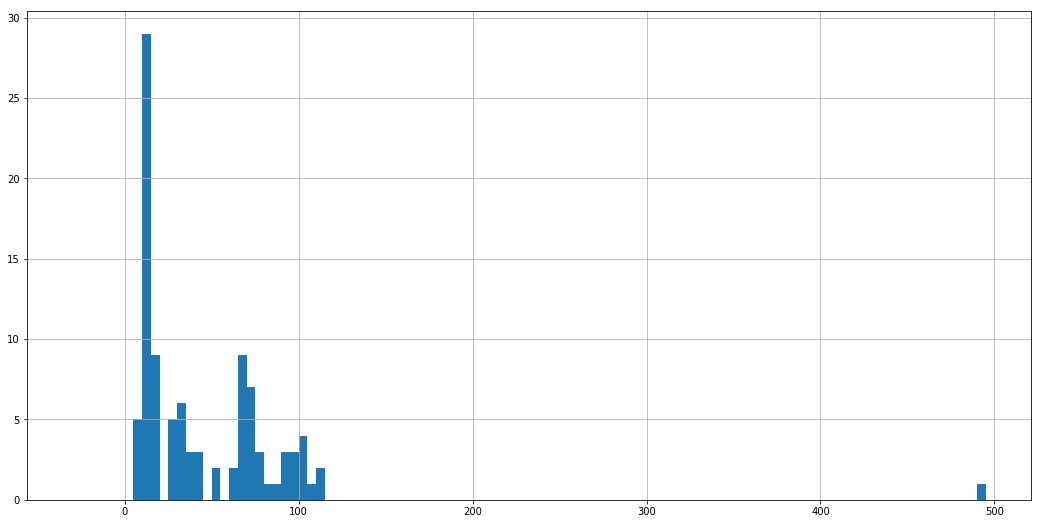

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("SOME VISUALS AS BELOW:")
print ("P/E distribution and count of companies\
       ")
print ("*****************************************************************")
print ("*****************************************************************")
bin_values = np.arange(start=-30, stop=500, step=5)
result_f['P_BY_E'].hist(bins=bin_values, figsize=[18,9])


DISTRIBUTION OF SECTORS AND COMPANY COUNT


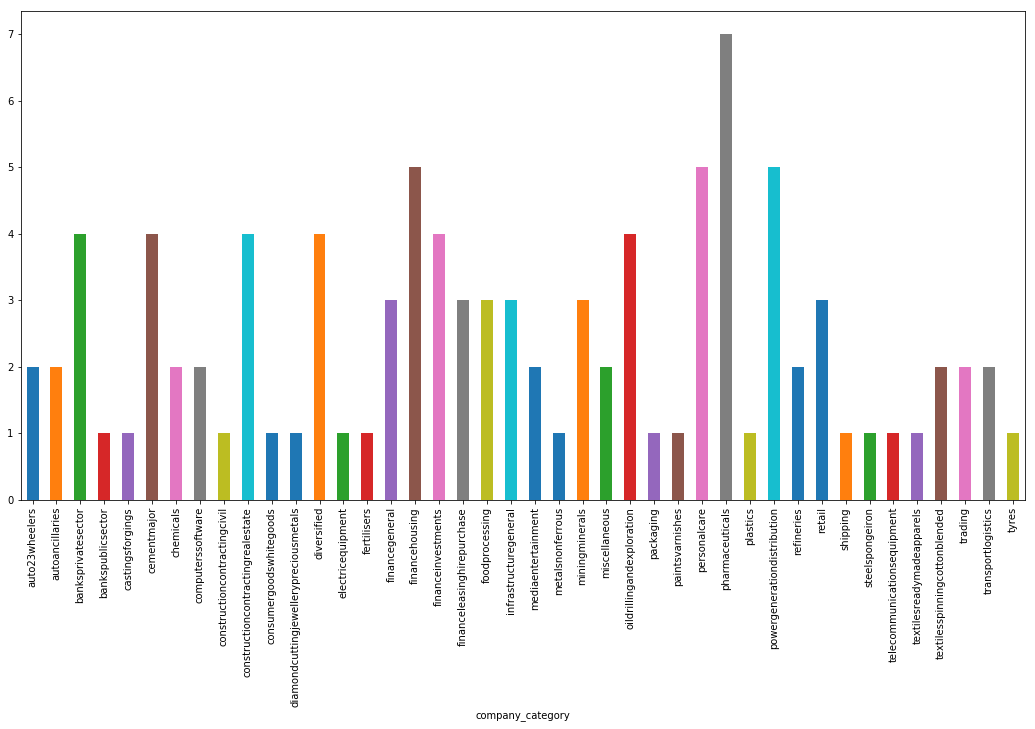

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
result_f.groupby('company_category').size().plot(kind='bar',figsize=(18,9))

print ("DISTRIBUTION OF SECTORS AND COMPANY COUNT")

In [39]:
##OUTLIERS OF P/E, having more value of P/E than 70, which can either be fixed by reverify   
#or data can be normnalized using modifed log values. Latter wasnt expected and  "done":
result_f1=result_f
result_f1.loc[:,'P_BY_E_NORMALIZED'] = result_f.P_BY_E.apply(lambda x: np.log(x + 1))


In [40]:
result_f1 
### CAN BE SEEN P_BY_E_NORMALIZED value

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat,P_BY_E_NORMALIZED
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED,4,4.283035
1,http://www.moneycontrol.com/india/stockpricequ...,BLC,diversified,balmerlawriecompany,118.49,70.0,3.16,16.21,10.0,22.07,2523.45,1,11.94,13.66,1.87,DIVERSIFIED,4,2.685123
2,http://www.moneycontrol.com/india/stockpricequ...,CTI,diversified,centurytextilesindustries,255.47,55.0,0.60,33.27,10.0,22.07,10211.78,1,14.90,27.48,3.58,DIVERSIFIED,4,3.349202
3,http://www.moneycontrol.com/india/stockpricequ...,V,diversified,voltas,105.36,350.0,0.67,15.15,1.0,22.07,17220.90,1,33.09,34.35,4.94,DIVERSIFIED,4,3.565298
4,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.0,1.99,50.54,10.0,36.29,24476.19,1,15.40,25.79,2.61,CEMENT - MAJOR,4,3.288029
5,http://www.moneycontrol.com/india/stockpricequ...,AC18,cementmajor,ambujacements,102.35,140.0,1.37,6.42,2.0,36.29,40685.87,1,22.01,31.92,2.00,CEMENT - MAJOR,4,3.494080
6,http://www.moneycontrol.com/india/stockpricequ...,OCL,cementmajor,oclindia,488.16,250.0,0.43,74.21,2.0,36.29,6679.52,1,11.32,15.82,2.40,CEMENT - MAJOR,4,2.822569
7,http://www.moneycontrol.com/india/stockpricequ...,PC,cementmajor,prismjohnson,20.38,0.0,NaN,1.40,10.0,36.29,5476.52,1,24.50,77.71,5.34,CEMENT - MAJOR,4,4.365770
8,http://www.moneycontrol.com/india/stockpricequ...,AE13,trading,adanienterprises,36.04,40.0,0.30,1.79,1.0,49.47,14528.49,1,51.00,73.80,3.67,TRADING,2,4.314818
9,http://www.moneycontrol.com/india/stockpricequ...,MMT,trading,mmtc,9.56,30.0,0.80,0.33,1.0,49.47,5632.50,1,104.31,113.79,3.93,TRADING,2,4.743104


P/E_normalized distribution and count of companies       
*****************************************************************
*****************************************************************


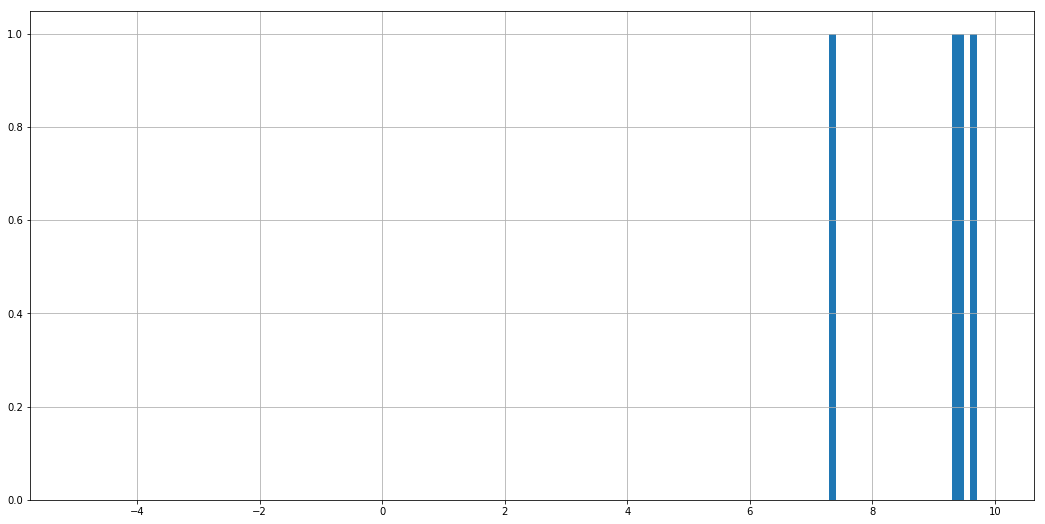

In [41]:
print ("P/E_normalized distribution and count of companies\
       ")
print ("*****************************************************************")
print ("*****************************************************************")
bin_values = np.arange(start=-5, stop=10, step=0.1)
result_f['P_BY_E'].hist(bins=bin_values, figsize=[18,9])

###ULTIMATELY OBSERVED, NORMALIZE CANT WORK JUST 1 PARAM, MAY BE NECESSARY to UNDERSTAND OTHEr params too and normalize them too

DISTRIBUTION OF MARKETCAP_RS_CR in CRORES and count of companies


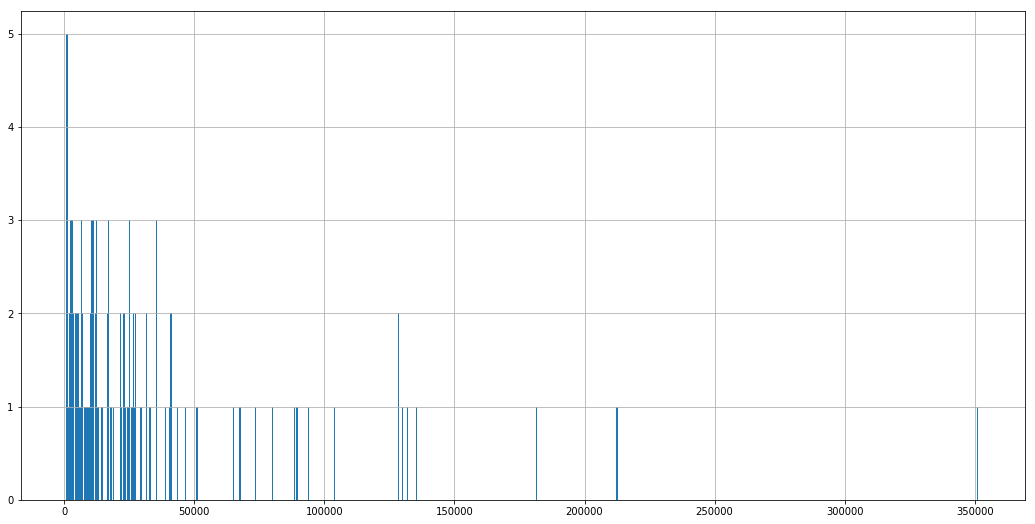

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

bin_values = np.arange(start=result_f.MARKETCAP_RS_CR.min()-100, stop=result_f.MARKETCAP_RS_CR.max()+1000, step=500)
result_f['MARKETCAP_RS_CR'].hist(bins=bin_values, figsize=[18,9])

print ("DISTRIBUTION OF MARKETCAP_RS_CR in CRORES and count of companies")

C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


DISTRIBUTION OF MARKETCAP_RS_CR as per sectors for 3rd and 4th highest based companies


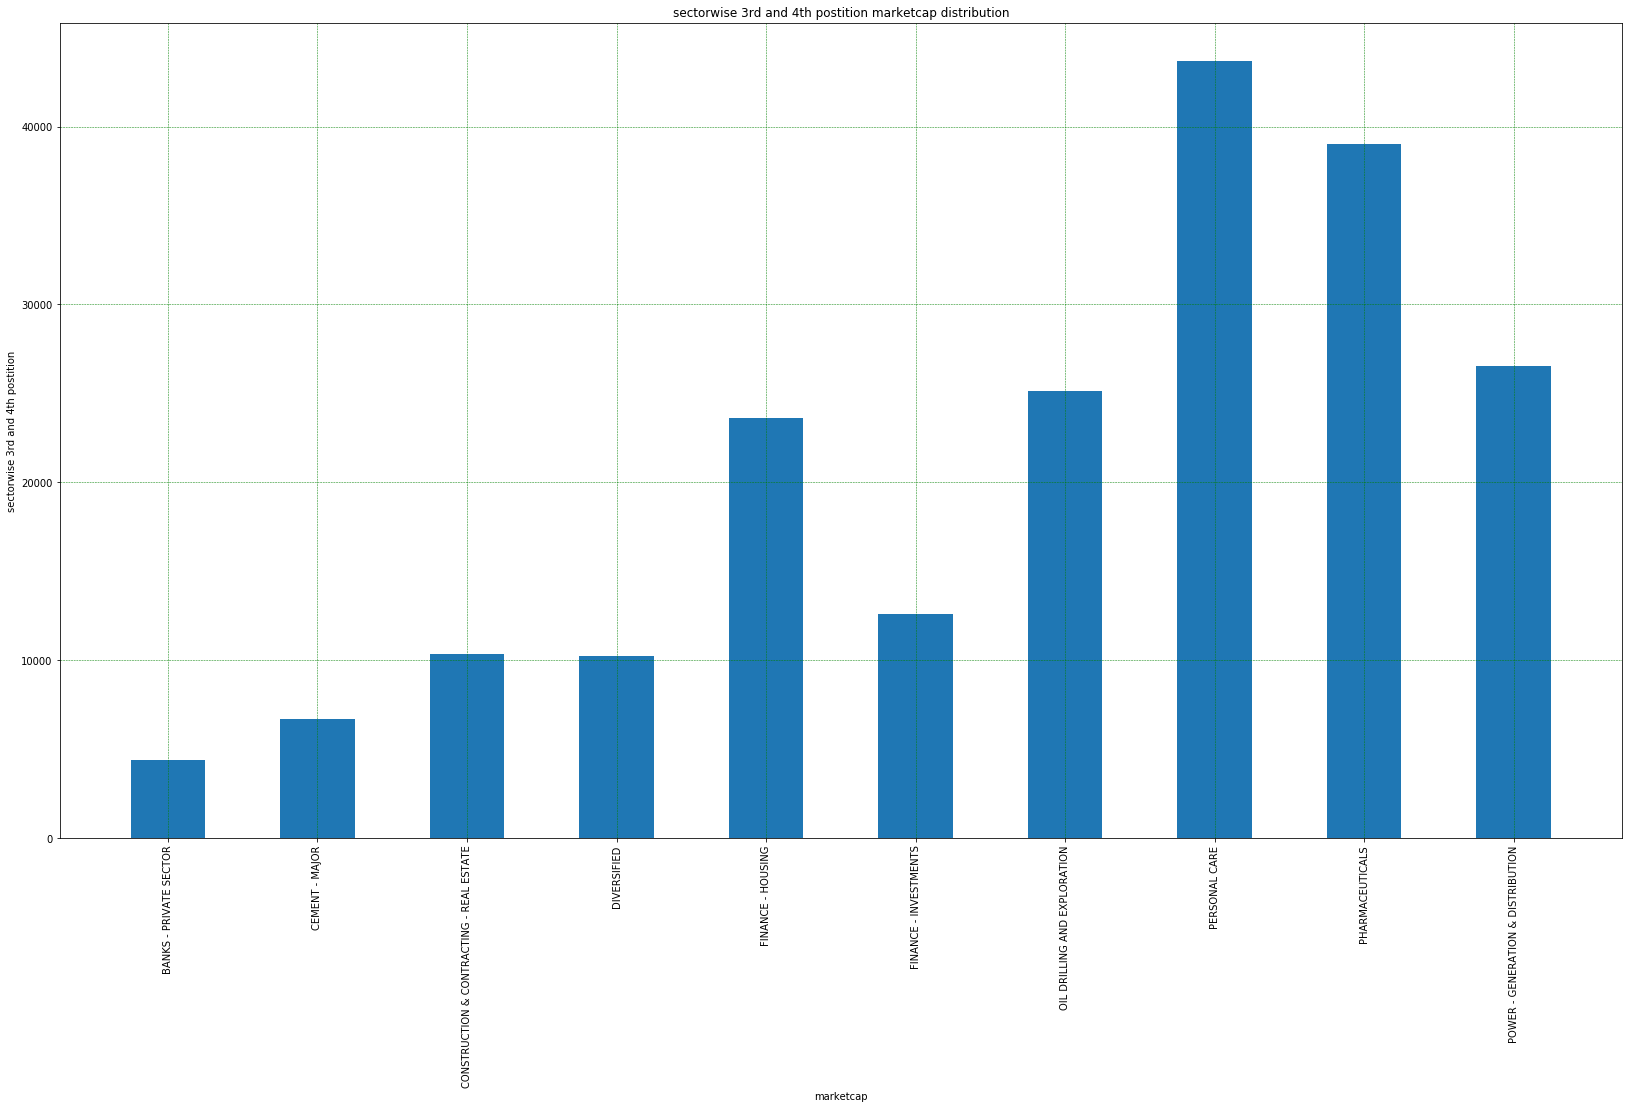

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(28, 15)
ax.bar(left=df_cc2.sector, height=df_cc2['MARKETCAP_RS_CR'], width=0.5)
ax.set_xlabel("marketcap")
ax.set_ylabel("sectorwise 3rd and 4th postition")
ax.set_title("sectorwise 3rd and 4th postition marketcap distribution")
ax.grid(color='g', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
print("DISTRIBUTION OF MARKETCAP_RS_CR as per sectors for 3rd and 4th highest based companies")

*****************************************************************
*****************************************************************
companywise 3rd and 4th and marketcap value on y axis        
*****************************************************************
*****************************************************************


C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


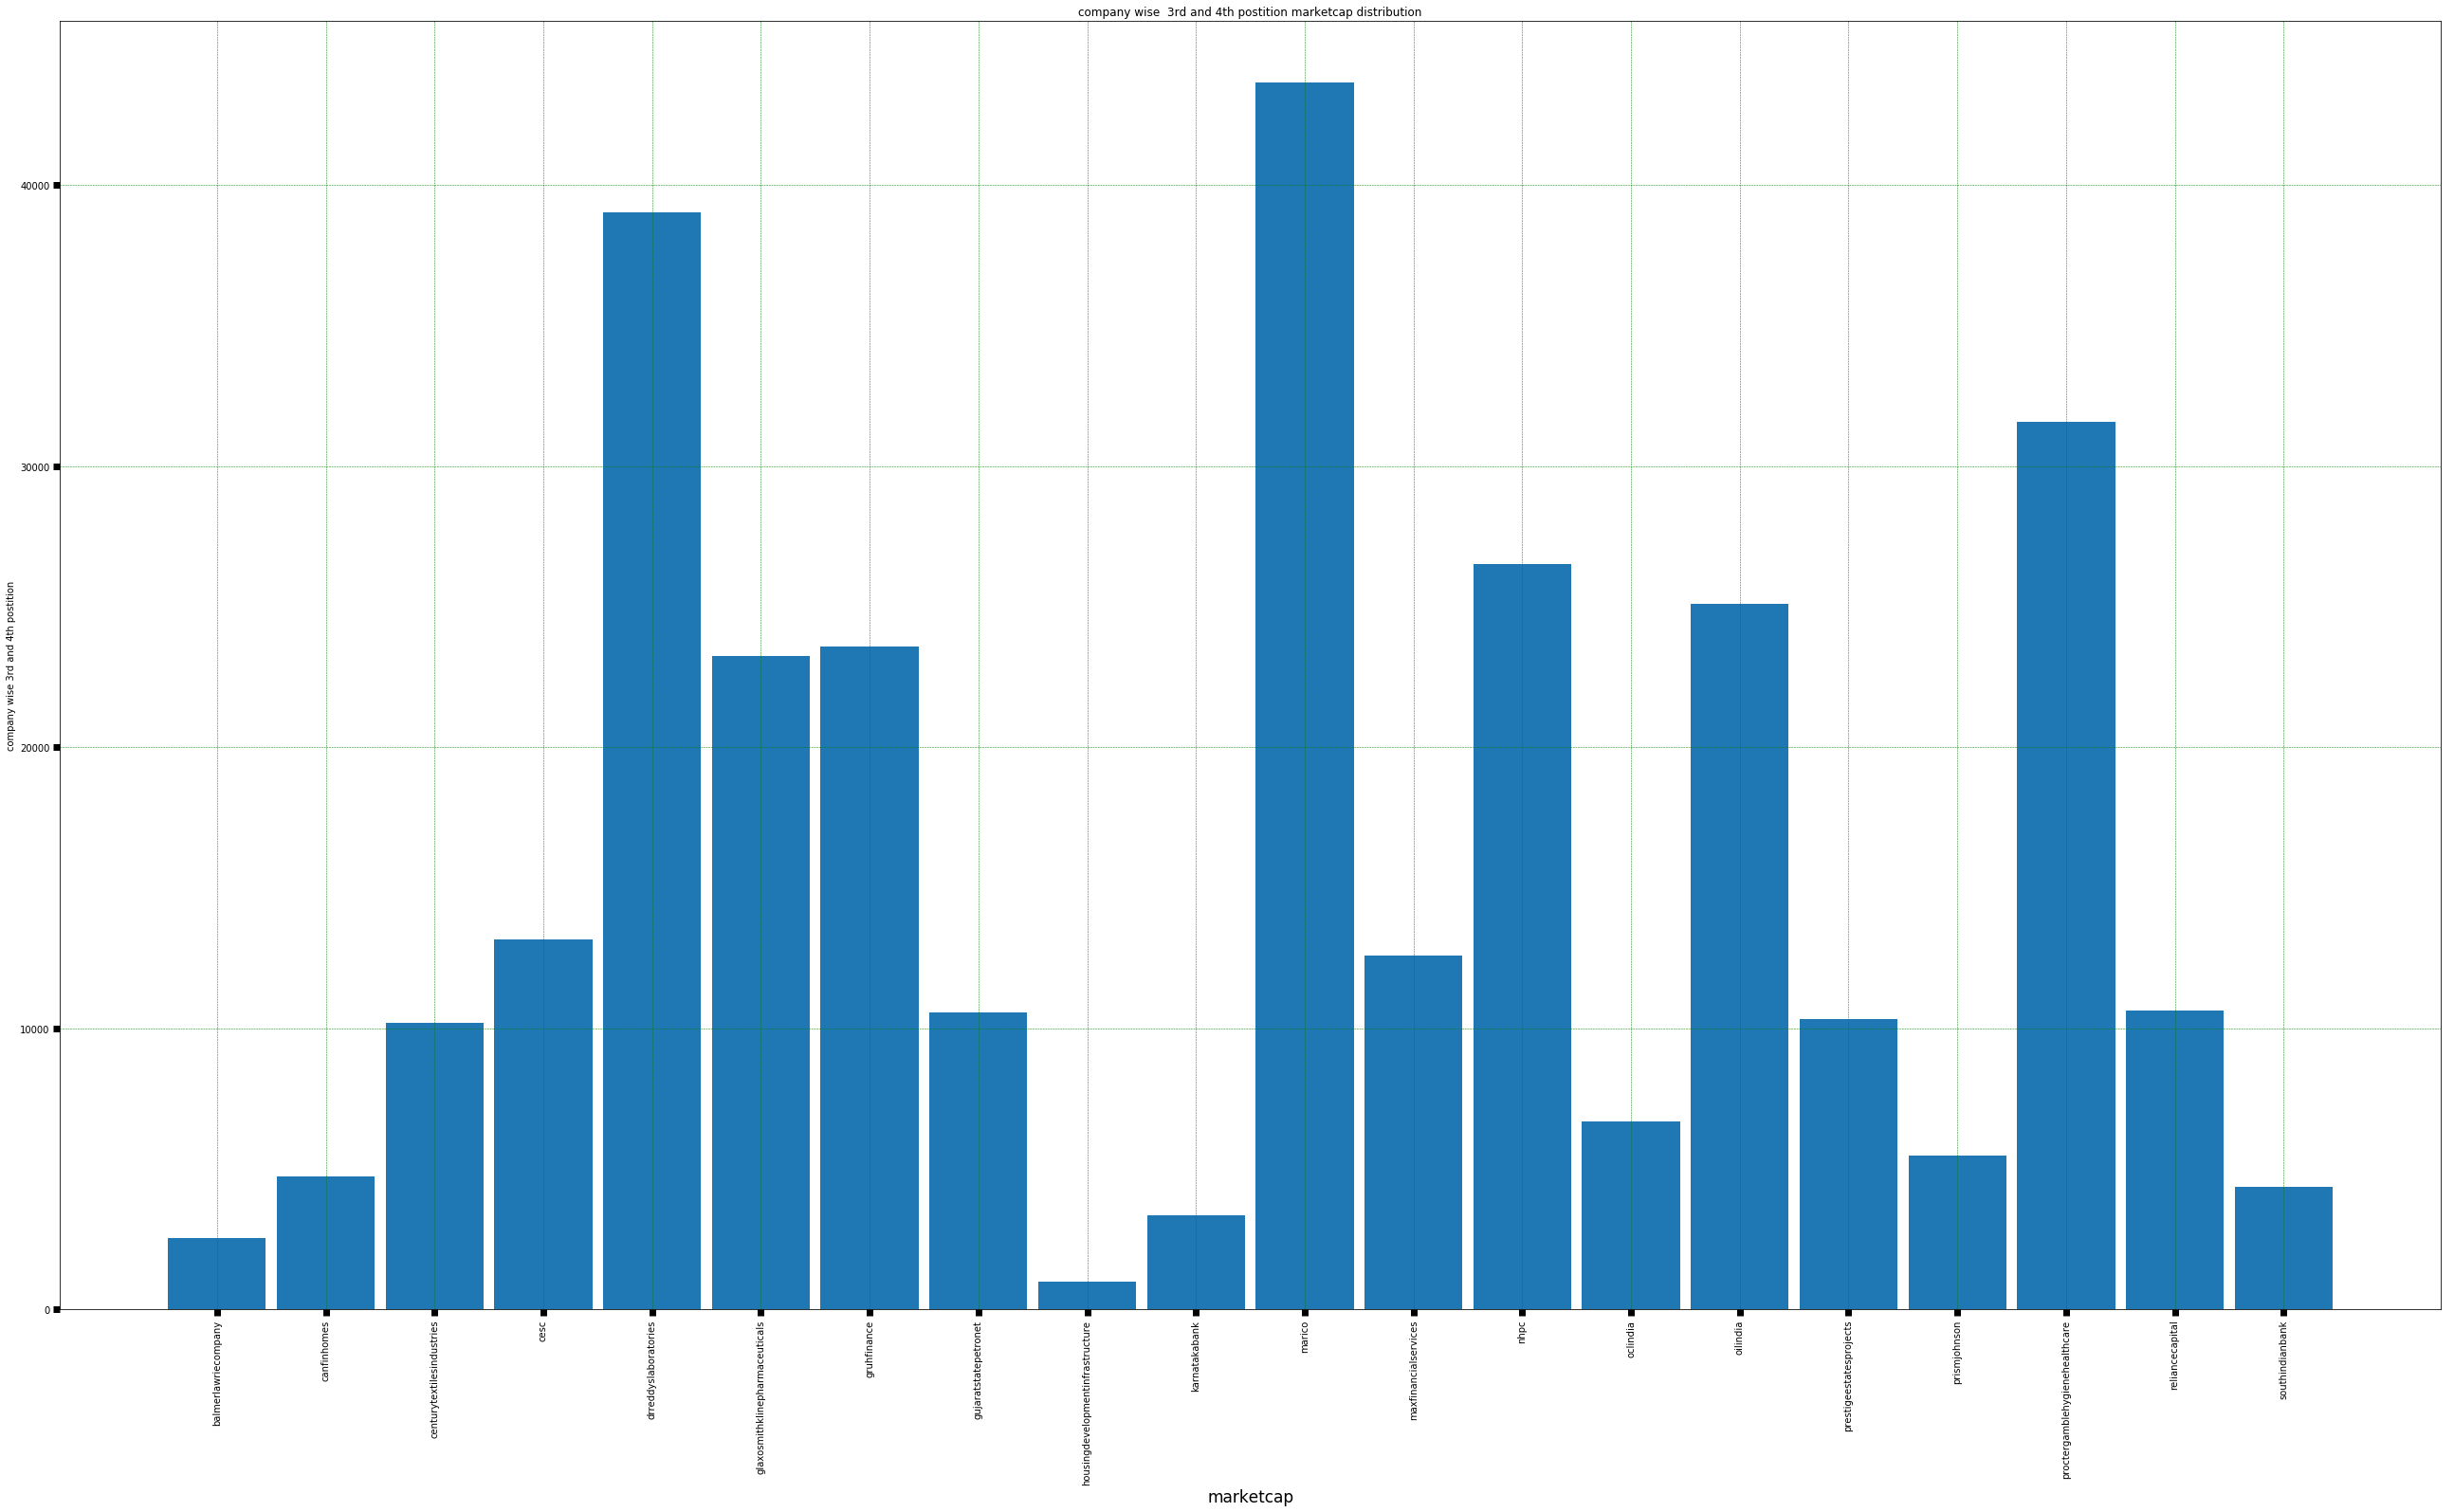

In [45]:
print ("*****************************************************************")
print ("*****************************************************************")
print ("companywise 3rd and 4th and marketcap value on y axis \
       ")
print ("*****************************************************************")
print ("*****************************************************************")
fig, ax = plt.subplots()
fig.set_size_inches(45, 25)
ax.bar(left=df_cc2.company_name, height=df_cc2['MARKETCAP_RS_CR'], width=0.9)
plt.xlabel('xlabel', fontsize=45)
ax.set_xlabel("marketcap")
ax.set_ylabel("company wise 3rd and 4th postition")
ax.set_title("company wise  3rd and 4th postition marketcap distribution")
ax.xaxis.label.set_size(17)
ax.grid(color='g', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
ax.tick_params(direction='out', length=7, width=7 )

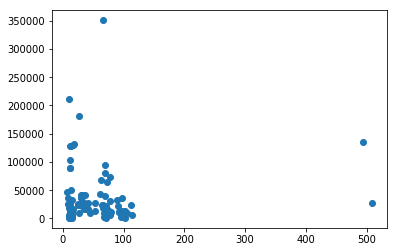

In [47]:
import matplotlib.pyplot as plt
plt.scatter(result_f['P_BY_E'], result_f['MARKETCAP_RS_CR'])
plt.show() # Depending on MARKETCAP_RS_CR on y axis vs P_BY_E on x 

### No such observation that p/e increasse and thus MC also increase

In [61]:
print("lets undesrtand dependent variabnle marketcap ==> how its dependent on independent params 'BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'")

lets undesrtand dependent variabnle marketcap ==> how its dependent on independent params 'BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'


In [53]:
pf=result_f.loc[:,('BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C','MARKETCAP_RS_CR')] #,index='MARKETCAP_RS_CR'

In [54]:
pf.set_index('MARKETCAP_RS_CR')

,BOOK_VALUE_RS,FACE_VALUE,INDUSTRY_P_BY_E,P_BY_C
MARKETCAP_RS_CR,,,,
22192.19,1364.33,10.0,22.07,62.99
2523.45,118.49,10.0,22.07,11.94
10211.78,255.47,10.0,22.07,14.90
17220.90,105.36,1.0,22.07,33.09
24476.19,498.72,10.0,36.29,15.40
40685.87,102.35,2.0,36.29,22.01
6679.52,488.16,2.0,36.29,11.32
5476.52,20.38,10.0,36.29,24.50
14528.49,36.04,1.0,49.47,51.00


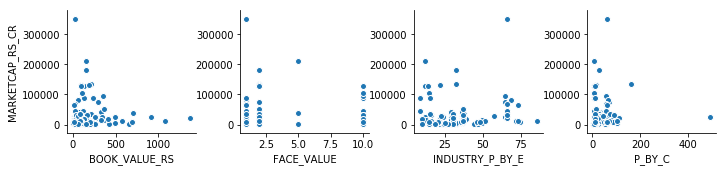

In [60]:
import seaborn as sns
pp = sns.pairplot(data=pf,
                  y_vars=['MARKETCAP_RS_CR'],
                  x_vars=['BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'])

In [67]:
#SQL output:
sql_f=result_f.iloc[:,1:16]
sql_f.to_csv('moneycontrol_after_cleaning_analyze_forsql.csv',index=False)
